In [12]:
%load_ext autoreload
%autoreload 2
from Class import GetAndFormatTheData
from Class import ReturnOps
from Class import Portfolio
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(11.7,8.27)})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
Datos = GetAndFormatTheData()
RetOp = ReturnOps()
Port = Portfolio()

In [32]:
Datos = pd.read_csv('/home/gaston/MachineLearning/Portfolios_Formed_on_ME_monthly_EW.csv')

In [33]:
Datos = Datos.set_index('Unnamed: 0')

In [34]:
Datos = Datos[['Lo 20','Hi 20']]/100

In [36]:
RetOp.AnnualizedMean(Datos,12) # 15.2 , 33.6,9.8,33.6,19.5

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [37]:
RetOp.AnnualizedVol(Datos,12)

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [40]:
Datos.head()

,Lo 20,Hi 20
Unnamed: 0,,
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [52]:
Datos = Datos.reset_index()

In [57]:
Datos.index = pd.to_datetime(Datos['Unnamed: 0'], format='%Y%m')

In [59]:
Datos.head()

,Unnamed: 0,Lo 20,Hi 20
Unnamed: 0,,,
1926-07-01,192607,-0.0057,0.0333
1926-08-01,192608,0.0384,0.0233
1926-09-01,192609,-0.0048,-0.0009
1926-10-01,192610,-0.0329,-0.0295
1926-11-01,192611,-0.0055,0.0316


In [60]:
Datos.index = Datos.index.to_period('M')

In [63]:
Datos19992015 = Datos['1999':'2015']

In [64]:
Datos19992015 = Datos19992015[['Lo 20','Hi 20']]

In [66]:
RetOp.AnnualizedMean(Datos19992015,12)

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [67]:
RetOp.AnnualizedVol(Datos19992015,12)

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

In [71]:
np.min(RetOp.drawdown(Datos19992015['Lo 20'])['Drawdown'])

-0.6248092431236988

In [72]:
RetOp.GetTheMinimunDateDraadown(Datos19992015['Lo 20'])

Period('2009-02', 'M')

In [101]:
np.min(RetOp.drawdown(Datos19992015['Hi 20'])['Drawdown'])

-0.5527349978713653

In [102]:
RetOp.GetTheMinimunDateDraadown(Datos19992015['Hi 20'])

Period('2009-02', 'M')

In [74]:
HFIndex = pd.read_csv('/home/gaston/MachineLearning/edhec-hedgefundindices.csv')

In [85]:
HFIndex['date'] = pd.to_datetime(HFIndex['date'])

In [87]:
HFIndex = HFIndex.set_index('date')

In [93]:
HFIndex20092018 = HFIndex['2009':'2019']

In [97]:
RetOp.semideviation(HFIndex20092018['2018'])

Convertible Arbitrage     0.280385
CTA Global                1.881099
Distressed Securities     0.683936
Emerging Markets          0.978959
Equity Market Neutral     0.704637
Event Driven              0.822477
Fixed Income Arbitrage    0.274388
Global Macro              0.724881
Long/Short Equity         1.331959
Merger Arbitrage          0.209990
Relative Value            0.344480
Short Selling             0.761811
Funds Of Funds            0.848233
dtype: float64

In [98]:
RetOp.semideviation(HFIndex20092018)

Convertible Arbitrage     0.668103
CTA Global                1.099578
Distressed Securities     0.949845
Emerging Markets          1.527598
Equity Market Neutral     0.518610
Event Driven              1.013464
Fixed Income Arbitrage    0.332054
Global Macro              0.507508
Long/Short Equity         1.213857
Merger Arbitrage          0.361121
Relative Value            0.571123
Short Selling             2.124006
Funds Of Funds            0.794842
dtype: float64

In [99]:
RetOp.Sesgo(HFIndex20092018)

Convertible Arbitrage     1.305911
CTA Global                0.052062
Distressed Securities    -0.254944
Emerging Markets          0.033123
Equity Market Neutral    -0.896327
Event Driven             -0.488821
Fixed Income Arbitrage    1.121453
Global Macro              0.348184
Long/Short Equity        -0.463703
Merger Arbitrage         -0.551065
Relative Value            0.159953
Short Selling             0.456518
Funds Of Funds           -0.646908
dtype: float64

In [105]:
HFIndex20002018 = HFIndex['2000':'2019']

In [106]:
RetOp.kurtosis(HFIndex20002018)

Convertible Arbitrage     23.001449
CTA Global                 2.845022
Distressed Securities      6.231720
Emerging Markets           5.941289
Equity Market Neutral     20.329621
Event Driven               5.543444
Fixed Income Arbitrage    33.378729
Global Macro               3.653278
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Relative Value            12.731096
Short Selling              4.352758
Funds Of Funds             7.584725
dtype: float64

### Cuestionario 2

In [47]:
import edhec_risk_kit_111 as erk
import pandas as pd

In [48]:
HFIndex = pd.read_csv('/home/gaston/MachineLearning/edhec-hedgefundindices.csv')
HFIndex['date'] = pd.to_datetime(HFIndex['date'])
HFIndex = HFIndex.set_index('date')
DatosPort = erk.get_ind_returns()

In [49]:
# MSR Maximun sharpe ratio
# GMV Global Minimun Volatility
# EW equally weight
Datos = GetAndFormatTheData()
RetOp = ReturnOps()
Port = Portfolio()
DatosPortCuest = DatosPort['2013':'2017'][['Books','Steel','Oil','Mines']]
DatosHFIndexCuest = HFIndex['2000':'2019']

In [59]:
RetOp.vargaussian(DatosHFIndexCuest,level=1,modified=False)

Convertible Arbitrage      3.484471
CTA Global                 5.033613
Distressed Securities      3.143018
Emerging Markets           5.807041
Equity Market Neutral      1.477190
Event Driven               3.085309
Fixed Income Arbitrage     1.951918
Global Macro               2.461907
Long/Short Equity          3.942044
Merger Arbitrage           1.535518
Relative Value             2.160459
Short Selling             10.213030
Funds Of Funds             2.938540
dtype: float64

In [51]:
RetOp.vargaussian(DatosHFIndexCuest,level=1,modified=True)

Convertible Arbitrage     10.366556
CTA Global                 4.664321
Distressed Securities      4.966909
Emerging Markets           8.679551
Equity Market Neutral      4.143206
Event Driven               4.573181
Fixed Income Arbitrage     6.647930
Global Macro               2.278564
Long/Short Equity          5.138116
Merger Arbitrage           2.128243
Relative Value             4.898484
Short Selling              9.832259
Funds Of Funds             4.879303
dtype: float64

In [53]:
RetOp.varhistoric(DatosHFIndexCuest,level=1)

Convertible Arbitrage      3.1674
CTA Global                 5.0938
Distressed Securities      4.2642
Emerging Markets           6.5496
Equity Market Neutral      1.9800
Event Driven               3.8540
Fixed Income Arbitrage     3.0748
Global Macro               2.2632
Long/Short Equity          4.5060
Merger Arbitrage           2.2654
Relative Value             2.1788
Short Selling             10.7684
Funds Of Funds             2.7200
dtype: float64

In [54]:
er = RetOp.AnnualizedMean(DatosPortCuest,12)
vol = RetOp.AnnualizedVol(DatosPortCuest,12)

In [55]:
cov = DatosPortCuest.cov()
cov

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [56]:
#5 year period is 10%
rf_per_period = (1+0.1)**(1/5)-1
rf_per_period

0.019244876491456564

In [64]:
Port.msr(0.1,er,cov)

array([0.00000000e+00, 1.00000000e+00, 2.08166817e-17, 6.01949046e-16])

In [58]:
Port.gmv(cov)

array([0.47702487, 0.        , 0.43411203, 0.0888631 ])

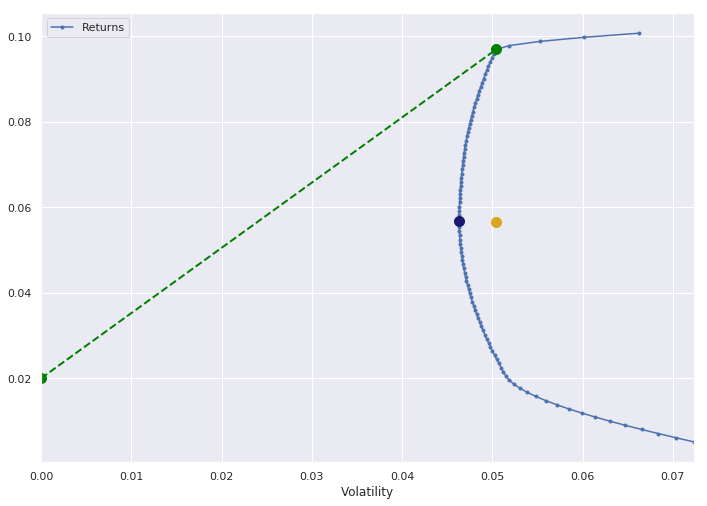

In [62]:
Port.plot_ef(100,er,cov,legend=True,show_cml=True,riskfree_rate=0.02,show_ew=True,show_gmv=True)

In [40]:
HFIndex.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [3]:
Datos = GetAndFormatTheData()
RetOp = ReturnOps()
Port = Portfolio()

In [4]:
#'AAPL','AMZ','MSFT

In [5]:
Base = Datos.GetDataFromYahooSeveral('2017-01-01','2017-03-01','1d','Adj Close','AAPL')

[*********************100%***********************]  1 of 1 downloaded


In [77]:
BaseRet = RetOp.ComputeSeveralReturns(Base)

In [78]:
BaseRet

,AAPL,AMZ,MSFT
Date,,,
2017-01-04,-0.001168,-0.000762,-0.004538
2017-01-05,0.005128,0.014137,0.000000
2017-01-06,0.011098,0.023644,0.008611
2017-01-09,0.009206,0.006876,-0.003180
2017-01-10,0.000965,0.002983,-0.000336
2017-01-11,0.005433,-0.002578,0.009239
2017-01-12,-0.004183,-0.000596,-0.009154
2017-01-13,-0.001750,0.022944,0.001344
2017-01-17,0.008066,-0.021781,-0.002684


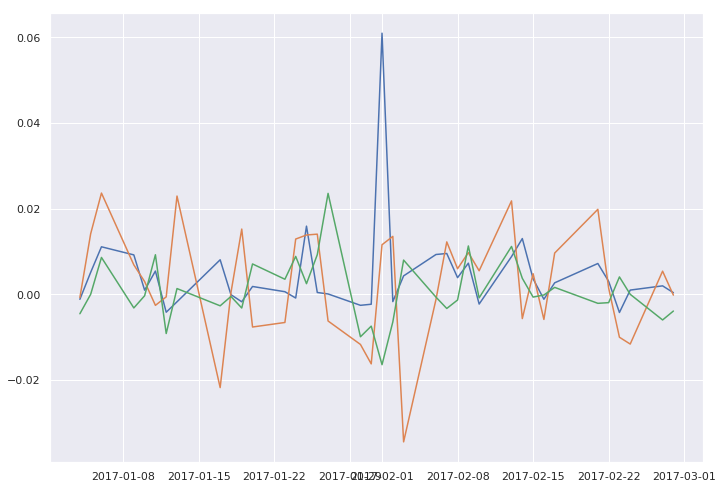

In [79]:
plt.plot(BaseRet)

In [80]:
RetOp.AnnualizingReturn(0.04,4)

0.1698585600000002

In [81]:
RetOp.MeanReturn(BaseRet)

AAPL    0.004519
AMZ     0.002776
MSFT    0.000767
dtype: float64

In [82]:
RetOp.VolReturn(BaseRet)

AAPL    0.010644
AMZ     0.012729
MSFT    0.007255
dtype: float64

In [83]:
RetOp.VolReturn(BaseRet)

AAPL    0.010644
AMZ     0.012729
MSFT    0.007255
dtype: float64

In [84]:
RetOp.kurtosis(BaseRet)

AAPL    22.090430
AMZ      3.440039
MSFT     4.399514
dtype: float64

In [85]:
RetOp.Sesgo(BaseRet)

AAPL    4.060158
AMZ    -0.606670
MSFT    0.575578
dtype: float64

In [86]:
from scipy.stats import kurtosis,skew

In [87]:
kurtosis(BaseRet)+3

array([22.09043008,  3.44003873,  4.39951357])

In [88]:
skew(BaseRet)

array([ 4.06015804, -0.60666999,  0.57557848])

In [89]:
BaseRet.std()

AAPL    0.010644
AMZ     0.012729
MSFT    0.007255
dtype: float64

In [90]:
Draw = RetOp.drawdown(BaseRet['AAPL'])
Draw.head()

,Wealth,Previous Peak,Drawdown
Date,,,
2017-01-04,998.831881,998.831881,0.0
2017-01-05,1003.953635,1003.953635,0.0
2017-01-06,1015.095696,1015.095696,0.0
2017-01-09,1024.440651,1024.440651,0.0
2017-01-10,1025.429059,1025.429059,0.0


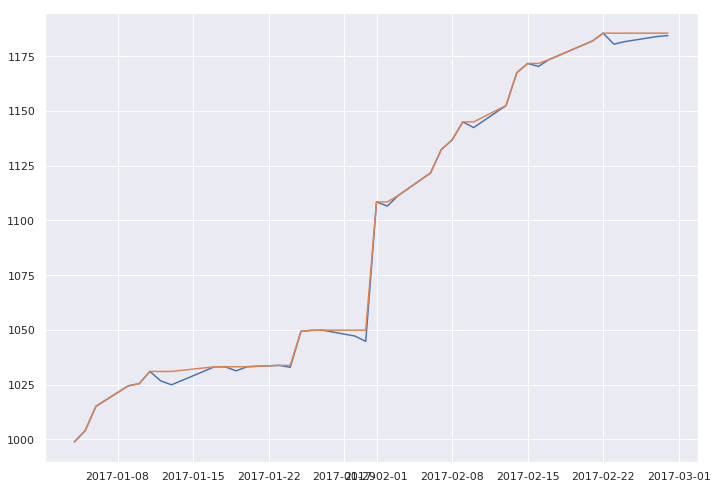

In [91]:
plt.plot(Draw[['Wealth','Previous Peak']])

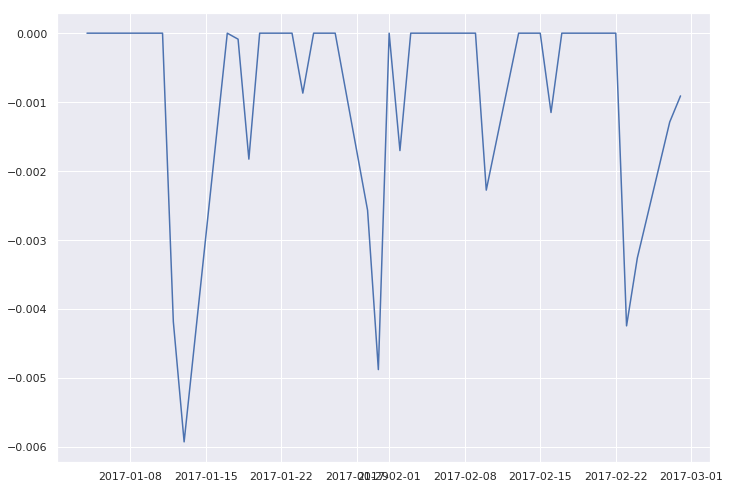

In [92]:
plt.plot(Draw['Drawdown'])

In [93]:
RetOp.AnnualizedVol(BaseRet,220)

AAPL    0.157880
AMZ     0.188803
MSFT    0.107611
dtype: float64

In [94]:
RetOp.AnnualizedMean(BaseRet,220)

AAPL    1.664845
AMZ     0.808388
MSFT    0.177148
dtype: float64

In [95]:
1000*(1+1.66)

2660.0

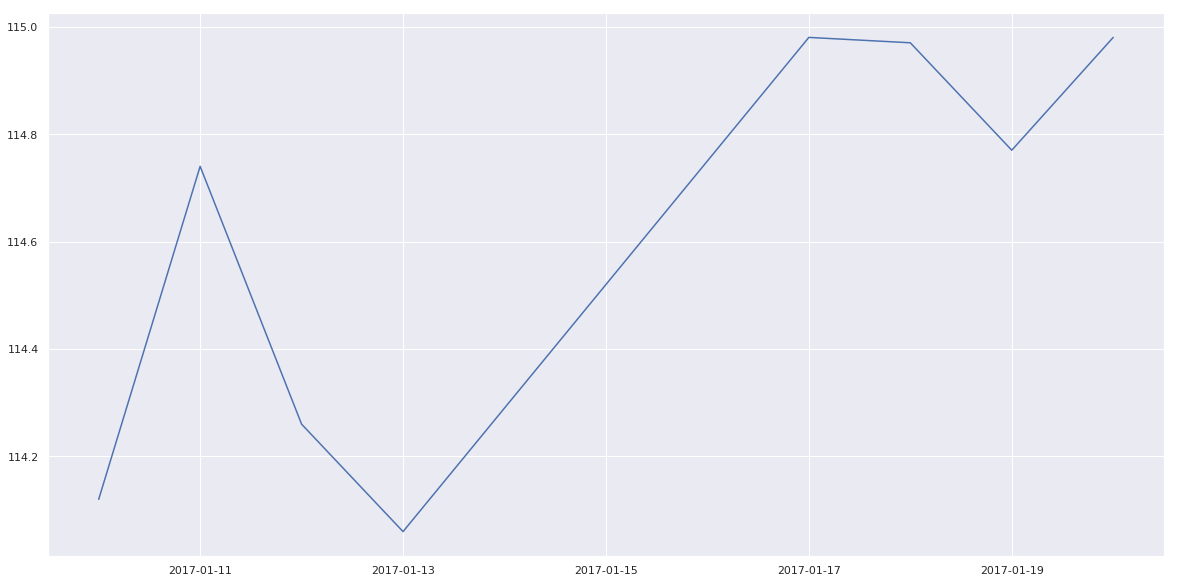

In [96]:
plt.figure(figsize=(20,10))
plt.plot(Base['2017-01-10':'2017-01-20']['AAPL'])

In [97]:
111*(1+1.66)

295.26

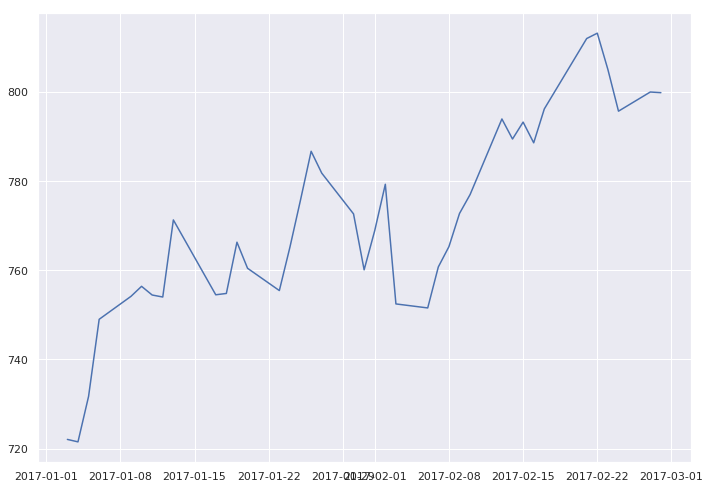

In [98]:
plt.plot(Base['AMZ'])

In [99]:
RetOp.is_normal(BaseRet['AAPL'])

False

In [100]:
RetOp.is_normal(BaseRet)

AAPL    False
AMZ      True
MSFT     True
dtype: bool

(array([20., 10.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.00424435,  0.00227796,  0.00880027,  0.01532258,  0.02184489,
         0.0283672 ,  0.03488951,  0.04141182,  0.04793413,  0.05445645,
         0.06097876]),
 <a list of 10 Patch objects>)

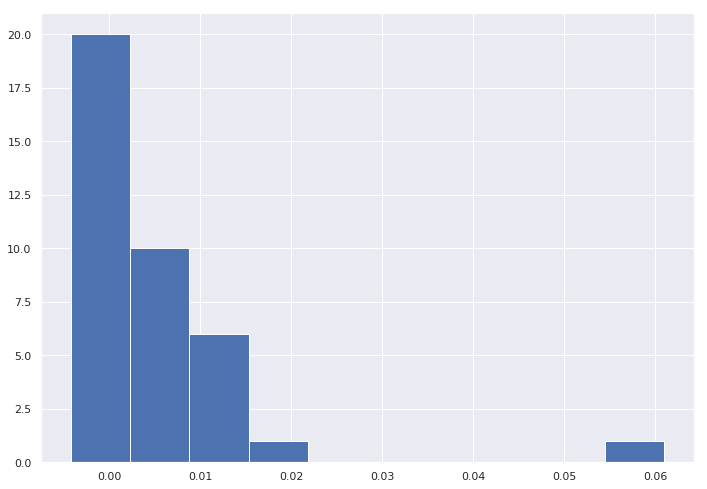

In [101]:
plt.hist(BaseRet['AAPL'])

In [102]:
RetOp.semideviation(BaseRet)

AAPL    0.001186
AMZ     0.008780
MSFT    0.003961
dtype: float64

In [103]:
RetOp.varhistoric(BaseRet)

AAPL    0.002810
AMZ     0.017074
MSFT    0.009268
dtype: float64

In [104]:
RetOp.cvarhistoric(BaseRet)

AAPL    0.004214
AMZ     0.028118
MSFT    0.013174
dtype: float64

In [105]:
RetOp.vargaussian(BaseRet)

AAPL    0.012758
AMZ     0.017885
MSFT    0.011008
dtype: float64

In [106]:
RetOp.vargaussian(BaseRet,modified=True)

AAPL   -0.006663
AMZ     0.019852
MSFT    0.009590
dtype: float64

In [107]:
RetOp.GetTheMinimunDateDraadown(BaseRet['AAPL'])

Timestamp('2017-01-13 00:00:00')

In [108]:
BaseRet.head()

,AAPL,AMZ,MSFT
Date,,,
2017-01-04,-0.001168,-0.000762,-0.004538
2017-01-05,0.005128,0.014137,0.000000
2017-01-06,0.011098,0.023644,0.008611
2017-01-09,0.009206,0.006876,-0.003180
2017-01-10,0.000965,0.002983,-0.000336


In [109]:
Port.sharpe_ratioAnnual(BaseRet,0.1,220)

AAPL    9.016377
AMZ     3.412708
MSFT    0.652012
dtype: float64

## Annualized returns

In [110]:
BaseRet = BaseRet[['AAPL','AMZ','MSFT']]

In [111]:
er = RetOp.AnnualizedMean(BaseRet,225)

In [112]:
cov = BaseRet.cov()

In [113]:
import numpy as np
ew = np.repeat(0.25,3)
Port.portfolio_return(ew, er)

0.684823655824256

In [114]:
Port.portfolio_vol(ew,cov)

0.004653725253065346

In [126]:
erReal = BaseRet.mean()

In [127]:
erCov = BaseRet.cov()

In [128]:
erCov

,AAPL,AMZ,MSFT
AAPL,0.000113,0.000027,-0.000019
AMZ,0.000027,0.000162,0.000001
MSFT,-0.000019,0.000001,0.000053


In [129]:
n_points = 100

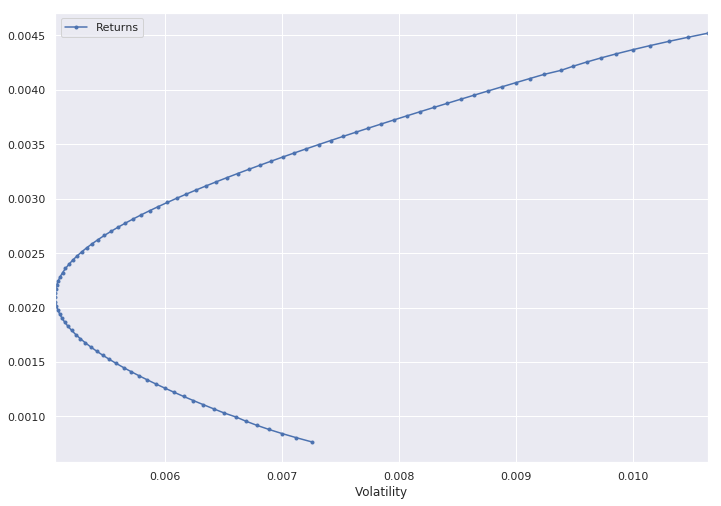

In [130]:
Port.plot_ef(n_points,erReal,erCov)

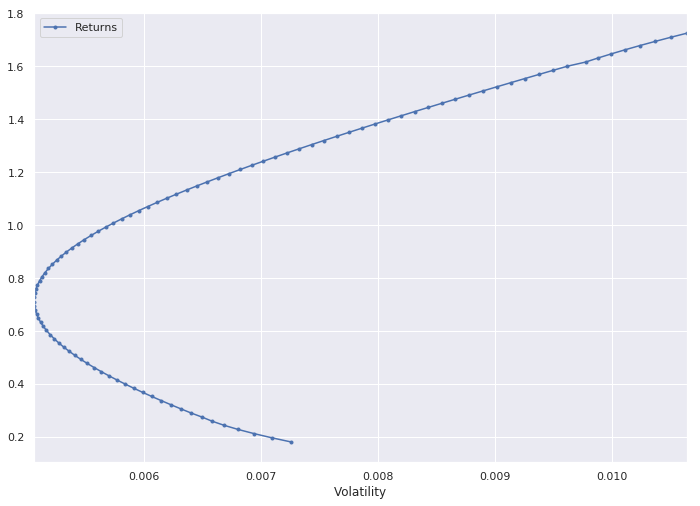

In [131]:
Port.plot_ef(n_points,er,cov)